# Introduction

## What is scraping the web?

## Why scrape data?

## Is this Legal/ Ethical?

# Programming:

## Requesting web pages

The `urllib` package is a python package for interacting with URL addresses. Today we will use the `request` module. The request module opens a web page in much the same way that the `open` function opens a local file, using the `urlopen` function. 

In [ ]:
from urllib import request

#a url to read from
link = "http://www.u.arizona.edu/~hammond/"

#open a link to the url
with request.urlopen(link) as w:
    #read the page
    myfile = w.read()
    
#print the decoded page
print(myfile.decode('UTF-8'))

## HTML

On top of `urllib` we will use the `BeautifulSoup` package to work with `html` data. `html` is the markup language that structures web pages. It looks like this:

```html
 <!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>

<h1>My First Heading</h1>
<p>My first paragraph.</p>

</body>
</html> 

```

### What is HTML?

- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

## Beautiful Soup

In [ ]:
!pip install bs4

In [6]:
# Import packages

# Webscraping:
from bs4 import BeautifulSoup
# access the web:
import requests
# data formnatting
import pandas as pd
# text searching:
import re

# Making the Soup
https://beautiful-soup-4.readthedocs.io/en/latest/#making-the-soup

`urllib` returns the webpage as a python `list`. This is not straightforward to work with, especially with complex sites. `bs4` converts this list into a **python object** which is easier to work with. 

In [37]:
with open("data/simple_webpage.html") as f:
    _txt_file = f.readlines()
print(_txt_file)
# mess:

['<!DOCTYPE html>\n', '\n', '<html>\n', '<body>\n', '\n', '<h1>My First Heading</h1>\n', '\n', '<p>My first paragraph.</p>\n', '\n', '<h1>My Second Heading</h1>\n', '\n', '<p>My Second paragraph.</p>\n', '\n', '<h1>My Third Heading</h1>\n', '\n', '<p>My Third paragraph.</p>\n', '\n', '</body>\n', '</html>\n']


In [38]:
with open("data/simple_webpage.html") as f:
    soup = BeautifulSoup(f)
print(soup)
print(type(soup))
# not mess:

<!DOCTYPE html>
<html>
<body>
<h1>My First Heading</h1>
<p>My first paragraph.</p>
<h1>My Second Heading</h1>
<p>My Second paragraph.</p>
<h1>My Third Heading</h1>
<p>My Third paragraph.</p>
</body>
</html>

<class 'bs4.BeautifulSoup'>


In [ ]:
print(type(soup))
# a soup object is a?

In [ ]:
print(vars(soup))
# what do they have?

## Soup Methods & Attributes

`bs4` converts all of the `html` tags into attributes and has a few handy methods for interacting with them:

In [6]:
print(soup.contents)

['html', <html>
<body>
<h1>My First Heading</h1>
<p>My first paragraph.</p>
<h1>My Second Heading</h1>
<p>My Second paragraph.</p>
<h1>My Third Heading</h1>
<p>My Third paragraph.</p>
</body>
</html>, '\n']


In [7]:
soup.h1

<h1>My First Heading</h1>

In [8]:
soup.p

<p>My first paragraph.</p>

# Kinds of objects
https://beautiful-soup-4.readthedocs.io/en/latest/#kinds-of-objects

## Name

In [9]:
soup.h1.text

'My First Heading'

## Attributes

In [10]:
soup.h1['class']
# Produces Key Error
# So add class to html variable

KeyError: 'class'

In [ ]:
soup.h1['id']

## Switch to actor Example

In this section we'll use a local example of a webpage. It's far simpler than most webpages, and therefore better at demonstraing `bs4`

In [63]:
with open("data/example_actor_webpage.html") as f:
    soup = BeautifulSoup(f)
print(soup)
# now that our example has more attributes ...

<!DOCTYPE html>
<html>
<body>
<div>
<h1 class="title" id="movie_title">The Irishman</h1>
<p>A paragraph of text about The Irishman, directed by <a href="https://www.imdb.com/name/nm0000217/">Martin Scorsese</a>.</p>
</div>
<div class="table" id="cast">
<h2>The Cast</h2>
<table>
<tr>
<td><a href="">Dave</a></td><td>Lead</td>
</tr>
<tr>
<td>Barry</td><td>Supporting Role</td>
</tr>
<tr>
<td>Alejandro</td><td>Supporting Role</td>
</tr>
</table>
</div>
<div>
<h1>Storyline</h1>
<p>My Third paragraph.</p>
</div>
</body>
</html>


In [ ]:
soup.h1['class']

## Text

In [ ]:
soup.h1.text

## Links (an attribute)

In [ ]:
soup.a.text

In [ ]:
soup.a['href']

# Navigating the tree

`bs4` Interprets webpages in a spatial structure, methods and attributes should be used to **navigate** the tree of html tags. Sub elements are seen as 'children' of higher elements. 

```html
<html>
<body>
    <head>
        <title>Example Webpage</title>
    </head>
    <h1>An Example</h1>
    <p><b>Text about the example</b></p>
</body>
</html>
```
<img src=https://www.tutorialspoint.com/beautiful_soup/images/html_document.jpg width=300px align=left>

In the above example `<h1>` and `<p>` are 'children' of `<body>`, and `<html>` is the parent of `<body>`

In [42]:
example = BeautifulSoup(
"""<html>
<body>
    <head>
        <title>Example Webpage</title>
    </head>
    <h1>An Example</h1>
    <p><b>Text about the example</b></p>
</body>
</html>"""
)

In [43]:
example.h1

<h1>An Example</h1>

In [44]:
example.p

<p><b>Text about the example</b></p>

In [60]:
list(example.body.children) # children returns a list iterator of child objects

['\n',
 <title>Example Webpage</title>,
 '\n',
 <h1>An Example</h1>,
 '\n',
 <p><b>Text about the example</b></p>,
 '\n']

In [59]:
example.h1.parent  # parent returns the 'parent' obhject

<body>
<title>Example Webpage</title>
<h1>An Example</h1>
<p><b>Text about the example</b></p>
</body>

Let's go in detail on each one of those directions.

## Going Down

### Children

In [64]:
list(soup.div.children)

['\n',
 <h1 class="title" id="movie_title">The Irishman</h1>,
 '\n',
 <p>A paragraph of text about The Irishman, directed by <a href="https://www.imdb.com/name/nm0000217/">Martin Scorsese</a>.</p>,
 '\n']

In [70]:
for child in soup.div.children:
    print(child)



<h1 class="title" id="movie_title">The Irishman</h1>


<p>A paragraph of text about The Irishman, directed by <a href="https://www.imdb.com/name/nm0000217/">Martin Scorsese</a>.</p>




### Descendants
Descendant are almost the same as children yet there's one major difference. `descendants' includes all of the lower objects in one list, turning the tree structure into a line.


In [68]:
for child in soup.div.descendants:
    print(child)

<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.NavigableString'>


## Going up

From any `bs4` object you can call the `parent` object to 'go up'. This will return the senior object itself, from which you can go back down. 

N.B. This is most often used in combination with a search.

In [71]:
soup.a.parent

<p>A paragraph of text about The Irishman, directed by <a href="https://www.imdb.com/name/nm0000217/">Martin Scorsese</a>.</p>

In [ ]:
list(soup.a.parents)

In [ ]:
list(soup.a.parents)[0]

## Going Sideways

In `bs4` you can access the `siblings` of objects. This is particularly useful for interacting with tabular data.

In [ ]:
list(soup.table.tr.td.next_siblings)

In [ ]:
for row in soup.table.contents:
    if row.text == 'Lead':
        print(row)
# Produces Attribute Errpr

BS4 Gives an error because not all the objects it's returning have a 'text' attribute. Namely the empty strings. You could easily shortcut this with an if statement or try/ except, but that would stretch this class.

In [ ]:
for row in soup.table.tr.td.next_siblings:
    if 'Lead' in row.string:
        print(row.previous_sibling.text)

In [ ]:
soup.table.tr.next_element

# Searching the tree
https://beautiful-soup-4.readthedocs.io/en/latest/#searching-the-tree

The most common way of using `bs4` is to search. In most cases, you will search for something, and then use one of the above attributes to access adjacent objects.

## Filters

In [77]:
soup.find_all('a')

[<a href="https://www.imdb.com/name/nm0000217/">Martin Scorsese</a>,
 <a href="">Dave</a>]

In [75]:
soup.find_all(['a', 'td'])

[<a href="https://www.imdb.com/name/nm0000217/">Martin Scorsese</a>,
 <td><a href="">Dave</a></td>,
 <a href="">Dave</a>,
 <td>Lead</td>,
 <td>Barry</td>,
 <td>Supporting Role</td>,
 <td>Alejandro</td>,
 <td>Supporting Role</td>]

In [83]:
soup.find_all(re.compile('^td.*'))

[<td><a href="">Dave</a></td>,
 <td>Lead</td>,
 <td>Barry</td>,
 <td>Supporting Role</td>,
 <td>Alejandro</td>,
 <td>Supporting Role</td>]

In [86]:
soup.find_all(string='Lead')

['Lead']

### Function Filter

A bit more challenging, though very useful.

https://beautiful-soup-4.readthedocs.io/en/latest/index.html?highlight=navigablestring#a-function

### Attributes

In [87]:
soup.find_all(id='movie_title')

[<h1 class="title" id="movie_title">The Irishman</h1>]

In [88]:
soup.find_all('h1', class_='title')

[<h1 class="title" id="movie_title">The Irishman</h1>]

## Searching text

You can also search the text of `html` objects, `bs4` will then return a specific `bs4.element.NavigableString` object, that you can use to navigate the tree.

In [98]:
soup.find(text='The Irishman')

'The Irishman'

In [100]:
type(soup.find_all(text='The Irishman')[0])

bs4.element.NavigableString

In [101]:
soup.find_all(text='The Irishman')[0].parent

<h1 class="title" id="movie_title">The Irishman</h1>

# Into the wild

Let's see how `bs4` operates with actual webpages.

In [150]:
with request.urlopen("https://www.imdb.com/title/tt1302006") as f:
    webpage = f.read()

In [151]:
soup = BeautifulSoup(webpage)

In [152]:
# links = soup.find_all('a')
links = soup.find_all(href=True)

In [153]:
links[0]

<link href="https://www.imdb.com/title/tt1302006/" rel="canonical"/>

In [ ]:
for link in links[::10]:
    if link.text:
        print(link)
        print(link.text)
        print('\n')

### Getting Headings

In practice `html` headings are an excellent way of navigating a web page, and finding the most relevant content. We can get a list of all headings by using the `find_all` method.

In [165]:
headings = soup.find_all(['h1','h2','h3'])

`find_all` returns a list of `bs4` objects for all the objects on the page that matched the search list `['h1','h2','h3']`.

In [173]:
print(headings)

[<h2><div class="checkin-error">Error</div></h2>, <h2><div class="checkin-success">Added to Your Check-Ins.</div></h2>, <h1 class="">The Irishman <span id="titleYear">(<a href="/year/2019/">2019</a>)</span> </h1>, <h3> First Trailer: 'Borat Subsequent Moviefilm'</h3>, <h3>Related News</h3>, <h3> Around The Web</h3>, <h3>Editorial Lists</h3>, <h3>User Lists</h3>, <h3>Share this Rating</h3>, <h3>User Polls</h3>, <h2>Videos</h2>, <h2>Photos</h2>, <h2>Cast</h2>, <h3> The Return of Joe Pesci</h3>, <h2>Storyline</h2>, <h2>Did You Know?</h2>, <h2>User Reviews</h2>, <h2>Frequently Asked Questions</h2>, <h2>Details</h2>, <h3 class="subheading">Box Office</h3>, <h3 class="subheading">Company Credits</h3>, <h3 class="subheading">Technical Specs</h3>, <h2>Contribute to This Page</h2>, <h3> Your Next Binge Watch Awaits</h3>, <h3>Recently Viewed</h3>]


This heading list can be then be used to rudimentary python checks on a contained list.

In [185]:
for h in headings:
    if h.text == 'User Reviews':
        print(h.text)
        print(h.parent.p.text)
#         h.parent.find_all('p')

User Reviews
After watching the Irishman I kept thing of the movie the Magnificent Ambersons very detailed long drawn out scenes and storylines I was pleasure to watch.


### Referencing CSS

In practice, web designer won't always use `html` tags for referencing objects. They're more likely to use a css `class` or `id`. `bs4` interacts with these two attributes using a dictionary mapping, where the python key is the html attribute name (`'id'` or `'class'`) and the python value is html attribute value (`'titleStoryLine'`,`'article'`)

```html
<div class="article" id="titleStoryLine">
```

```python
soup.find('div', {'id':'titleStoryLine'})
```

```python
soup.find('div', {'class':'article'})
```

`class` and `id` are the built-in css handles for html, but html allows for custom attributes. This means that in practice you'll encounter many attribute structures, and `bs4` allows you to interact with any of them. 

In [162]:
story_line = soup.find('div', {'id':'titleStoryLine'})

print(story_line.p.text)


    Frank "The Irishman" Sheeran is a man with a lot on his mind. The former labor union high official and hitman, learned to kill serving in Italy during the Second World War. He now looks back on his life and the hits that defined his mob career, maintaining connections with the Bufalino crime family. In particular, the part he claims to have played in the disappearance of his life-long friend, Jimmy Hoffa, the former president of the International Brotherhood of Teamsters, who mysteriously vanished in late July 1975 at the age of 62.
Written by
bcarruthers-76500 


# Applying what we know

Here are three exercises that use some of the skills above. Each question is relevant to a specific webpage, and so you may want to visit that site to understand the question. 

The answers are hidden below each question.

## Excercise 1

Extract the h1 heading tag from example.com.

**Click here** for the answer
<!--
html = request.urlopen('http://www.example.com/')
bs = BeautifulSoup(html.read())
print(bs.h1)
-->

## Exercise 2

Using urlopen and BeautifulSoup extract and display all the header tags from en.wikipedia.org/wiki/Main_Page.

**Click here** for the answer
<!--
# open the wiki main page
html = request.urlopen('https://en.wikipedia.org/wiki/Main_Page')

# make the soup
bs = BeautifulSoup(html)

# use the finda_all method to find all the titles
titles = bs.find_all(['h1', 'h2','h3','h4','h5','h6'])

# print the titles
print('List all the header tags :', *titles, sep='\n\n')
-->

## Exercise 3

Write a Python program to get the number of followers of a given twitter account.

In [ ]:
# code here

# import the packages

# get the handle using input

# make url link with handle

# make the soup

# use a try and except control structure to get the followers
    follow_box = bs.find('li',{'class':'ProfileNav-item ProfileNav-item--followers'})
    followers = follow_box.find('a').find('span',{'class':'ProfileNav-value'})
    print("Number of followers: {} ".format(followers.get('data-count')))

**Click here** for the answer
<!--
from bs4 import BeautifulSoup
import requests

# get the handle using input
handle = input('Input your account name on Twitter: ') 

# make url link with handle
temp = requests.get('https://twitter.com/'+handle)

# make the soup
bs = BeautifulSoup(temp.text)

# use a try and except control structure
try:
    follow_box = bs.find('li',{'class':'ProfileNav-item ProfileNav-item--followers'})
    followers = follow_box.find('a').find('span',{'class':'ProfileNav-value'})
    print("Number of followers: {} ".format(followers.get('data-count')))
except:
    print('Account name not found...')

-->

# Real world 
## What genre of films do actors mainly work in?

In [19]:
with request.urlopen('https://www.imdb.com/name/nm0000134/?ref_=tt_cl_t1') as f:
    actor = f.read()

In [20]:
soup = BeautifulSoup(actor)

### Getting into the Filmography

In [21]:
filmography = soup.find(id='filmography')

In [22]:
# actor_filmography = filmography.find('div', {'data-category' : 'actor'}).find_next('div', class_='filmo-category-section')

In [23]:
# Break up the above
actor_filmography = filmography.find('div', {'data-category' : 'actor'})
actor_filmography = actor_filmography.find_next('div', class_='filmo-category-section')

In [24]:
film_links = actor_filmography.find_all(href=True)

## Let's see those links

In [ ]:
for link in film_links:
    print(link['href'])

In [ ]:
baselink = 'https://www.imdb.com'
for link in film_links:
    if link['href'].startswith('/'):
        print(baselink + link['href'])

## Collecting Genres

In [27]:
baselink = 'https://www.imdb.com'
for link in film_links[:5]:
    if link['href'].startswith('/'):
        
        # CRAWL into another page
        
        url = baselink + link['href']
        page = requests.get(url)
        soup = BeautifulSoup(page.content)

        subtext = soup.find('div', class_='subtext').find_all(href=True)
        print(subtext)

[<a href="/search/title?genres=action&amp;explore=title_type,genres">Action</a>]
[<a href="/search/title?genres=crime&amp;explore=title_type,genres">Crime</a>, <a href="/search/title?genres=drama&amp;explore=title_type,genres">Drama</a>]
[<a href="/search/title?genres=drama&amp;explore=title_type,genres">Drama</a>]


In [28]:
baselink = 'https://www.imdb.com'

# Somewhere to store our genres:
genres = []

# to search our for genre:
genre = re.compile('genre')
    
for link in film_links[:5]:
    if link['href'].startswith('/'):
        url = baselink + link['href']
        page = requests.get(url)
        soup = BeautifulSoup(page.content)
        subtext = soup.find('div', class_='subtext').find_all(href=genre, text=True)
        for g in subtext:
            genres.append(g.text)

In [29]:
genres

['Action', 'Crime', 'Drama', 'Drama']

### Collecting more actors

In [40]:
name = re.compile('name')
actors = []
cache = []

for link in film_links[:5]:
    if link['href'].startswith('/'):
        url = baselink + link['href']
        page = requests.get(url)
        soup = BeautifulSoup(page.content)
        _actors = soup.find('table', class_='cast_list').find_all(href=name, text=True)
        for a in _actors:
            actors.append(a.text.strip('\n')[1:])
            cache.append(baselink+a['href'])

In [41]:
actors

['Robert De Niro',
 'Edgar Ramírez',
 'Robert De Niro',
 'Chloë Grace Moretz',
 'Miles Teller',
 'Robert De Niro',
 'Anne Hathaway',
 'Cate Blanchett',
 'Oscar Isaac',
 'Donald Sutherland']

In [42]:
cache

['https://www.imdb.com/name/nm0000134/',
 'https://www.imdb.com/name/nm1183149/',
 'https://www.imdb.com/name/nm0000134/',
 'https://www.imdb.com/name/nm1631269/',
 'https://www.imdb.com/name/nm1886602/',
 'https://www.imdb.com/name/nm0000134/',
 'https://www.imdb.com/name/nm0004266/',
 'https://www.imdb.com/name/nm0000949/',
 'https://www.imdb.com/name/nm1209966/',
 'https://www.imdb.com/name/nm0000661/']

## Crawling

In [187]:
cache = ['https://www.imdb.com/title/tt1302006/']
_cache = []
limit = 5

In [188]:
films = []

In [189]:
baselink = 'https://www.imdb.com'

In [190]:
genre = re.compile('genre')
name = re.compile('name')
title = re.compile('title')

In [191]:
def related_films(cast, baselink = 'https://www.imdb.com', log = ['']):
    actor_links = [baselink+x['href'] for x in cast[:5] if x not in log]
    related = []
    
    for link in actor_links:
        soup = BeautifulSoup(requests.get(link).content)
        related.append(soup.find('div', id='knownfor').find_all('a')[0]['href'])
    
    return [baselink+l for l in related]

In [192]:
log  = []
while len(films) < limit:
    for film_link in cache[:limit]:
        # Check that the film is new
        if film_link not in log:
            print(film_link)
            # make the soup           
            webpage = requests.get(film_link)
            soup = BeautifulSoup(webpage.content)
            
            # get the film title
            film_name = soup.find('h1').text.strip('\n')
            
            # get the film genres
            genres = []
            _genres = soup.find('div', class_='subtext').find_all(href=genre, text=True)
            for g in _genres:
                genres.append(g.text)
            
            # get the film actors
            actors = []
            _actors = soup.find('table', class_='cast_list').find_all(href=name, text=True)
            
            for a in _actors:
                actors.append(a.text)
                
            # get the films duration
            duration = soup.find('div', class_='subtext').find('time', text=True).text
            
            # record where we've been
            log.append(film_link)
            
            # save the film data:
            films.append({'film_name': film_name, 'genres' : genres, 'actors': actors, 'duration':duration})
        
        print(len(films))
        
    # crawl around for more links 
    if len(set(cache) - set(log)) == 0:
        # get the next films from this ones 'related'
        _cache = related_films(_actors, log=log)
        cache.extend(_cache)

https://www.imdb.com/title/tt1302006/
1
1
https://www.imdb.com/title/tt0081398/
2
https://www.imdb.com/title/tt0070666/
3
https://www.imdb.com/title/tt0099685/
4
https://www.imdb.com/title/tt0105236/
5


# Present out data in Pandas

In [193]:
df = pd.DataFrame(films)

In [194]:
df

,film_name,genres,actors,duration
0,The Irishman (2019),"[Biography, Crime, Drama]","[ Robert De Niro\n, Al Pacino\n, Joe Pesci\n...",\n 3h 29min\n ...
1,Raging Bull (1980),"[Biography, Drama, Sport]","[ Robert De Niro\n, Cathy Moriarty\n, Joe Pe...",\n 2h 9min\n ...
2,Serpico (1973),"[Biography, Crime, Drama]","[ Al Pacino\n, John Randolph\n, Jack Kehoe\n...",\n 2h 10min\n ...
3,Goodfellas (1990),"[Biography, Crime, Drama]","[ Robert De Niro\n, Ray Liotta\n, Joe Pesci\...",\n 2h 26min\n ...
4,Reservoir Dogs (1992),"[Crime, Drama, Thriller]","[ Harvey Keitel\n, Tim Roth\n, Michael Madse...",\n 1h 39min\n ...


## Tidy Data

In [195]:
def tidy_date(rough):
    time = rough[-8:-3]
    hours = int(time[0])
    minutes = int(time[2:])
    return (hours*60)+minutes

df['minutes'] = df.duration.str.strip().apply(tidy_date)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html

In [196]:
df

,film_name,genres,actors,duration,minutes
0,The Irishman (2019),"[Biography, Crime, Drama]","[ Robert De Niro\n, Al Pacino\n, Joe Pesci\n...",\n 3h 29min\n ...,209
1,Raging Bull (1980),"[Biography, Drama, Sport]","[ Robert De Niro\n, Cathy Moriarty\n, Joe Pe...",\n 2h 9min\n ...,129
2,Serpico (1973),"[Biography, Crime, Drama]","[ Al Pacino\n, John Randolph\n, Jack Kehoe\n...",\n 2h 10min\n ...,130
3,Goodfellas (1990),"[Biography, Crime, Drama]","[ Robert De Niro\n, Ray Liotta\n, Joe Pesci\...",\n 2h 26min\n ...,146
4,Reservoir Dogs (1992),"[Crime, Drama, Thriller]","[ Harvey Keitel\n, Tim Roth\n, Michael Madse...",\n 1h 39min\n ...,99


## Re format data

In [199]:
genres_df = pd.DataFrame(df.explode('genres'))

In [211]:
genres_df

,film_name,genres,actors,duration,minutes
0,The Irishman (2019),Biography,"[ Robert De Niro\n, Al Pacino\n, Joe Pesci\n...",\n 3h 29min\n ...,209
0,The Irishman (2019),Crime,"[ Robert De Niro\n, Al Pacino\n, Joe Pesci\n...",\n 3h 29min\n ...,209
0,The Irishman (2019),Drama,"[ Robert De Niro\n, Al Pacino\n, Joe Pesci\n...",\n 3h 29min\n ...,209
1,Raging Bull (1980),Biography,"[ Robert De Niro\n, Cathy Moriarty\n, Joe Pe...",\n 2h 9min\n ...,129
1,Raging Bull (1980),Drama,"[ Robert De Niro\n, Cathy Moriarty\n, Joe Pe...",\n 2h 9min\n ...,129
1,Raging Bull (1980),Sport,"[ Robert De Niro\n, Cathy Moriarty\n, Joe Pe...",\n 2h 9min\n ...,129
2,Serpico (1973),Biography,"[ Al Pacino\n, John Randolph\n, Jack Kehoe\n...",\n 2h 10min\n ...,130
2,Serpico (1973),Crime,"[ Al Pacino\n, John Randolph\n, Jack Kehoe\n...",\n 2h 10min\n ...,130
2,Serpico (1973),Drama,"[ Al Pacino\n, John Randolph\n, Jack Kehoe\n...",\n 2h 10min\n ...,130
3,Goodfellas (1990),Biography,"[ Robert De Niro\n, Ray Liotta\n, Joe Pesci\...",\n 2h 26min\n ...,146


# Show duration by genre

In [213]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

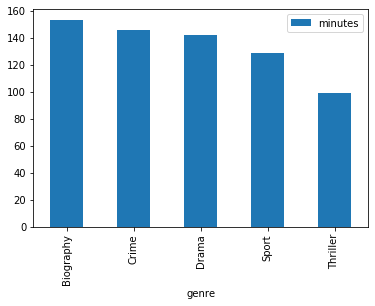

In [215]:
df[['minutes','genre']].groupby('genre').mean().plot(kind='bar')

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html